In [14]:
import os
import numpy as np
import vtk
from vtk.util import numpy_support

from PIL import Image
import  matplotlib.pyplot as plt

from scipy import ndimage
from skimage import io, color, filters

In [5]:


micro_image = io.imread("../target.png")

# Convert the image to grayscale if it's in color
if micro_image.ndim == 3:
    micro_image = color.rgb2gray(micro_image)

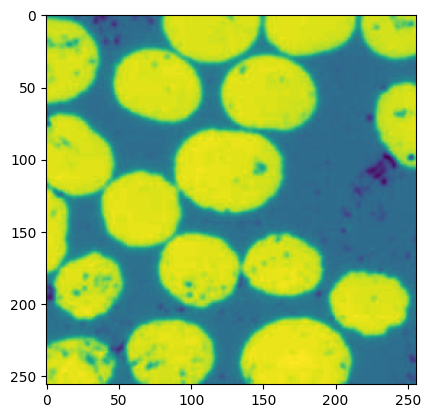

In [6]:
plt.imshow(micro_image)

In [7]:
array = np.array(micro_image)

In [8]:
# Use a thresholding method from skimage.filters
threshold_value = filters.threshold_otsu(array)

binary_array = array > threshold_value

In [11]:
# Fill holes in the binary image
binary_array = ndimage.binary_fill_holes(binary_array)

# Additional operations with ndimage (e.g., binary morphology)
binary_array= ndimage.binary_opening(binary_array)

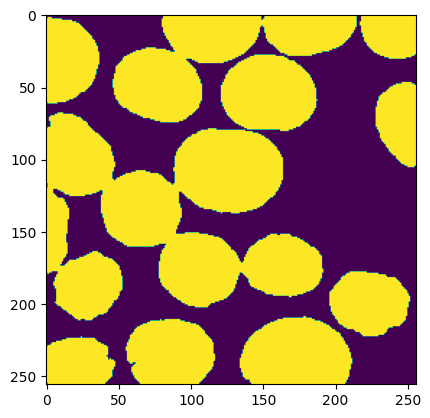

In [12]:
plt.imshow(binary_array)

In [21]:
binary_array = binary_array.astype(np.uint8)
binary_array.shape

(256, 256)

In [22]:
# Copy along the third dimension to create a 3D array
three_d_array = np.tile(binary_array[:, :, np.newaxis], (1, 1, 256))

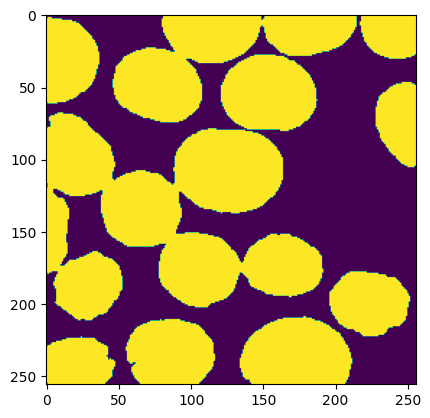

In [25]:
plt.imshow(three_d_array[:,:,7])

In [36]:
## SAVE DATA
## Convert the NumPy arrays to float32
scalar_data = three_d_array.transpose(0,1,2).astype(np.uint8)


# Create a VTKImageData object
image_data = vtk.vtkImageData()
image_data.SetDimensions(tuple(x+1 for x in scalar_data.shape)) ## important add +1 to every dimension

# Flatten the scalar data
flat_scalar_data = scalar_data.flatten(order='F')
vtk_scalar_array = vtk.vtkUnsignedCharArray()
vtk_scalar_array.SetNumberOfComponents(1)
vtk_scalar_array.SetArray(flat_scalar_data, len(flat_scalar_data), True)
vtk_scalar_array.SetName("material")

# Set the scalar data as cell data
image_data.GetCellData().SetScalars(vtk_scalar_array)



# Set the spacing and origin of the image data (you may need to adjust this based on your data)
image_data.SetSpacing(.14E-3, .14E-3, .14E-3) ## TODO set Spacing accordingly to voxel size
image_data.SetOrigin(0.0, 0.0, 0.0)

# Write the VTI file
writer = vtk.vtkXMLImageDataWriter()


writer.SetFileName("fiber_256x256x256.vti")
writer.SetInputData(image_data)

writer.Write()

1